In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cluster_tools as ct
import sklearn.cluster as cluster
import sklearn.metrics as skmet
import errors as err
import scipy.optimize as opt
%matplotlib inline

In [86]:
df_co2 = pd.read_csv('co2.csv')
df_gdp = pd.read_csv('gdp.csv', skiprows=3)

In [87]:
print(df_co2.describe())
print(df_gdp.describe())


       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

               2013          2014          2015          2016          2017  \
count  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02   
mean   1.283613e+06  1.289604e+06  1.281995e+06  1.285745e+06  1.310145e+06   
std    4.092640e+06  4.111523e+06  4.081612e+06  4.089924e+06  4.169992e+06   
min    1.000000e+

In [88]:
df_co2 = df_co2[df_co2["2019"].notna()]

print(df_co2.describe())

# alternative way of targetting one or more columns

df_gdp = df_gdp[df_gdp["2019"].notna()]

print(df_gdp.describe)

       1960  1961  1962  1963  1964  1965  1966  1967  1968  1969  ...  \
count   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   
mean    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
std     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
min     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
25%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
50%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
75%     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
max     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

               2013          2014          2015          2016          2017  \
count  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02  2.390000e+02   
mean   1.283613e+06  1.289604e+06  1.281995e+06  1.285745e+06  1.310145e+06   
std    4.092640e+06  4.111523e+06  4.081612e+06  4.089924e+06  4.169992e+06   
min    1.000000e+

In [89]:
df_co2_2019 = df_co2[["Country Name", "Country Code", "2019"]].copy()
df_gdp_2019 = df_gdp[["Country Name", "Country Code", "2019"]].copy()

In [90]:
print(df_co2_2019.describe())
print(df_gdp_2019.describe())

               2019
count  2.390000e+02
mean   1.353171e+06
std    4.335365e+06
min    1.000000e+01
25%    4.915000e+03
50%    2.970000e+04
75%    3.088800e+05
max    3.434401e+07
               2019
count  2.550000e+02
mean   2.845284e+12
std    9.586893e+12
min    5.422315e+07
25%    1.088080e+10
50%    6.113687e+10
75%    5.700678e+11
max    8.765425e+13


In [91]:
df_2019 = pd.merge(df_co2_2019, df_gdp_2019, on="Country Name", how="outer")
print(df_2019.describe())
df_2019.to_excel("co2_gdp.xlsx")

             2019_x        2019_y
count  2.390000e+02  2.550000e+02
mean   1.353171e+06  2.845284e+12
std    4.335365e+06  9.586893e+12
min    1.000000e+01  5.422315e+07
25%    4.915000e+03  1.088080e+10
50%    2.970000e+04  6.113687e+10
75%    3.088800e+05  5.700678e+11
max    3.434401e+07  8.765425e+13


In [92]:
print(df_2019.describe())
df_2019 = df_2019.dropna() # entries with one datum or less are useless.
print()
print(df_2019.describe())
# rename columns
df_2019 = df_2019.rename(columns={"2019_x":"CO2 emissions", "2019_y":"GDP"})

             2019_x        2019_y
count  2.390000e+02  2.550000e+02
mean   1.353171e+06  2.845284e+12
std    4.335365e+06  9.586893e+12
min    1.000000e+01  5.422315e+07
25%    4.915000e+03  1.088080e+10
50%    2.970000e+04  6.113687e+10
75%    3.088800e+05  5.700678e+11
max    3.434401e+07  8.765425e+13

             2019_x        2019_y
count  2.340000e+02  2.340000e+02
mean   1.381307e+06  3.097982e+12
std    4.377292e+06  9.970599e+12
min    1.000000e+01  5.422315e+07
25%    5.060000e+03  1.350689e+10
50%    2.980500e+04  6.908409e+10
75%    3.316775e+05  8.021051e+11
max    3.434401e+07  8.765425e+13


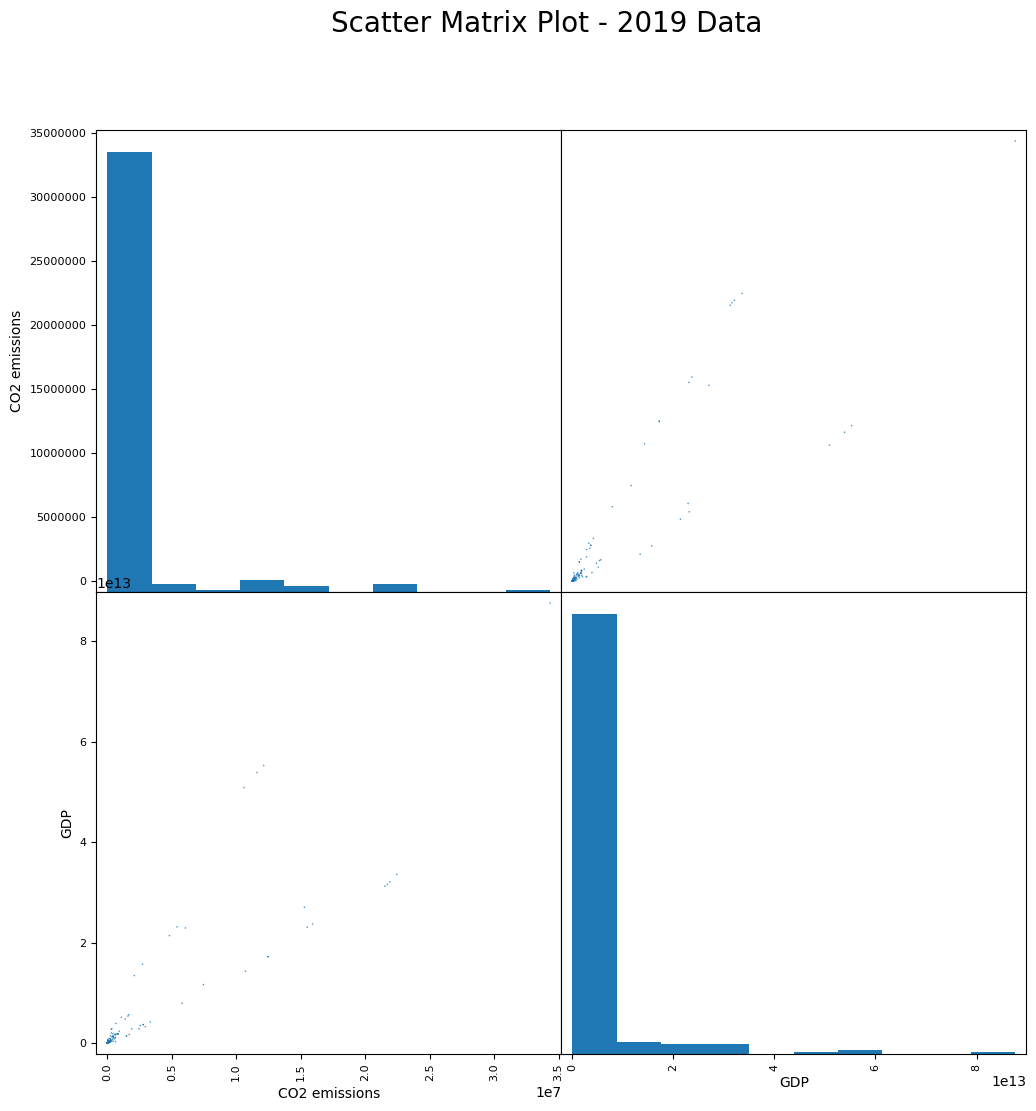

In [93]:
pd.plotting.scatter_matrix(df_2019, figsize=(12, 12), s=5, alpha=0.8)
plt.suptitle("Scatter Matrix Plot - 2019 Data", fontsize=20, )
plt.show()


In [106]:


a=df_2019.corr(method='pearson')


a.style.background_gradient(cmap='Greens')

,CO2 emissions,GDP
CO2 emissions,1.000000,0.893439
GDP,0.893439,1.000000


In [95]:
df_cluster = df_2019[["CO2 emissions", "GDP"]].copy()
# normalise
df_cluster, df_min, df_max = ct.scaler(df_cluster)

In [96]:
print("n score")

# loop over number of clusters

for ncluster in range(2, 10):
    
    # set up the clusterer with the number of expected clusters
    kmeans = cluster.KMeans(n_clusters=ncluster)

    # Fit the data, results are stored in the kmeans object
    kmeans.fit(df_cluster) # fit done on x,y pairs

    labels = kmeans.labels_

    # extract the estimated cluster centres
    cen = kmeans.cluster_centers_

    # calculate the silhoutte score
    print(ncluster, skmet.silhouette_score(df_cluster, labels))

n score
2 0.9184975700621356
3 0.9137901023574343
4 0.8885542646948699
5 0.8989725264358684
6 0.8982088184151824
7 0.8406214040333759
8 0.8452328898788836
9 0.8341950924649255


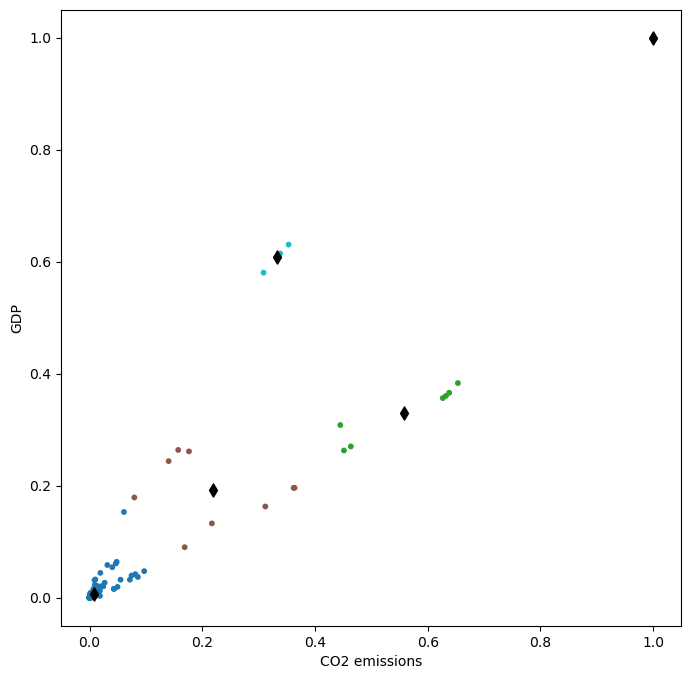

In [97]:
ncluster = 5

# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)

# Fit the data, results are stored in the kmeans object
kmeans.fit(df_cluster) # fit done on x,y pairs
labels = kmeans.labels_

# extract the estimated cluster centres
cen = kmeans.cluster_centers_
xcen = cen[:, 0]
ycen = cen[:, 1]

# cluster by cluster
plt.figure(figsize=(8.0, 8.0))

cm = plt.cm.get_cmap('tab10')

plt.scatter(df_cluster["CO2 emissions"], df_cluster["GDP"], 10, labels,marker="o", cmap=cm)

plt.scatter(xcen, ycen, 45, "k", marker="d")

plt.xlabel("CO2 emissions")

plt.ylabel("GDP")

plt.show()





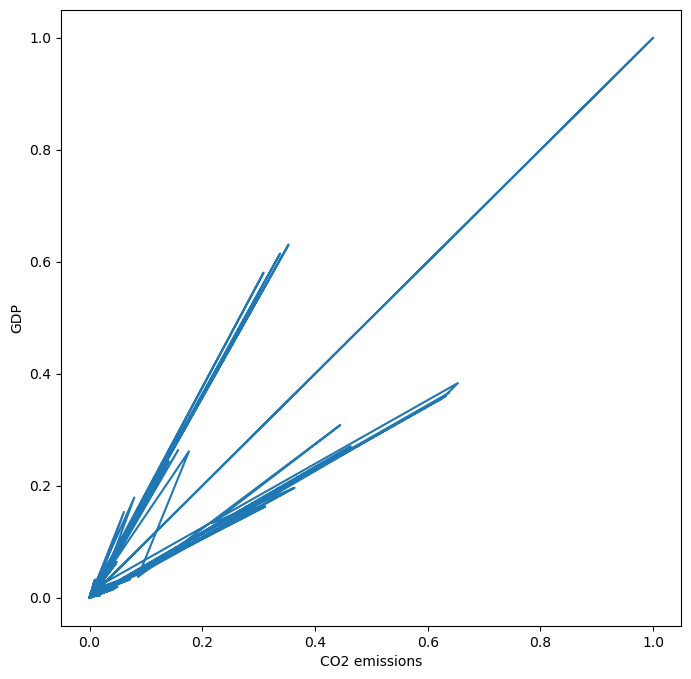

In [98]:
plt.figure(figsize=(8.0, 8.0))
plt.plot(df_cluster["CO2 emissions"], df_cluster["GDP"])


plt.xlabel("CO2 emissions")

plt.ylabel("GDP")

plt.show()



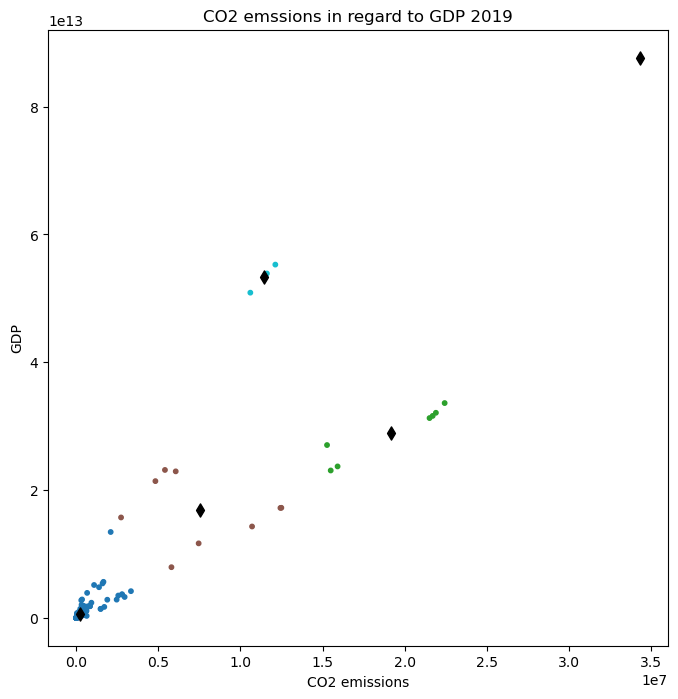

In [99]:
# move the cluster centres to the original scale
cen = ct.backscale(cen, df_min, df_max)
xcen = cen[:, 0]
ycen = cen[:, 1]
# cluster by cluster
plt.figure(figsize=(8.0, 8.0))
cm = plt.cm.get_cmap('tab10')
plt.scatter(df_2019["CO2 emissions"], df_2019["GDP"], 10, labels, marker="o",cmap=cm)
plt.scatter(xcen, ycen, 45, "k", marker="d")

plt.title('CO2 emssions in regard to GDP 2019')
plt.xlabel("CO2 emissions")
plt.ylabel("GDP")
plt.show()


# world GDP historic DATA

In [15]:
df_world_gdp = pd.read_csv('world_gdp.csv')
df_world_gdp = df_world_gdp.dropna()

df_world_gdp['Year'] = df_world_gdp['Year'].astype(int)
df_world_gdp.dtypes




Year       int64
World    float64
dtype: object

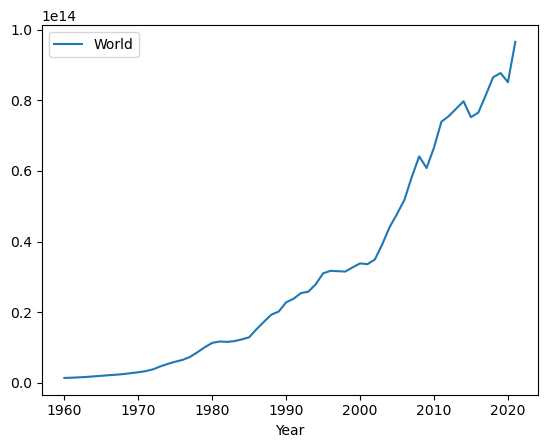

In [16]:
df_world_gdp.plot("Year", "World")
plt.show()


In [39]:
def exponential(t, n0, g):
    """Calculates exponential function with scale factor n0 and growth rate g."""
    t = t - 1990
    f = n0 * np.exp(g*t)
    return f

In [40]:
print(type(df_world_gdp["Year"].iloc[1]))

df_world_gdp["Year"] = pd.to_numeric(df_world_gdp["Year"])

print(type(df_world_gdp["Year"].iloc[1]))

param, covar = opt.curve_fit(exponential, df_world_gdp["Year"], df_world_gdp["World"], p0=(1.2e12, 0.03))

print("GDP 1960", param[0]/1e9)

print("growth rate", param[1])

<class 'numpy.int64'>
<class 'numpy.int64'>
GDP 1960 21311.50002149121
growth rate 0.05099832420177351


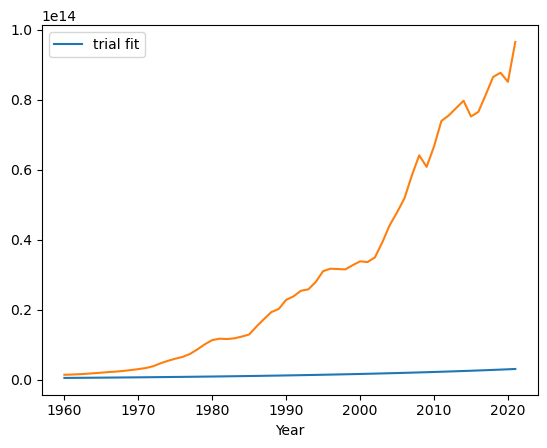

In [41]:
plt.figure()
plt.plot(df_world_gdp["Year"], exponential(df_world_gdp["Year"], 1.2e12, 0.03), label = "trial fit")

plt.plot(df_world_gdp["Year"], df_world_gdp["World"])

plt.xlabel("Year")

plt.legend()

plt.show()

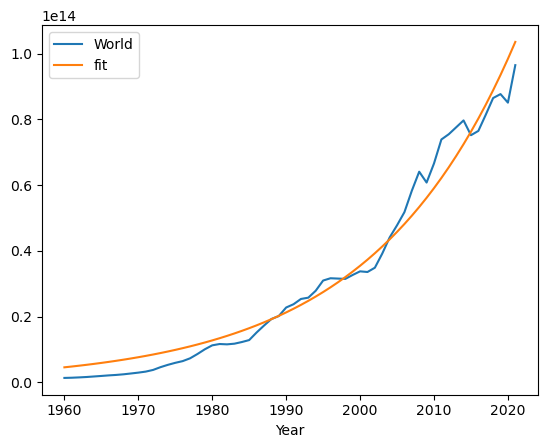

In [42]:
df_world_gdp["fit"] = exponential(df_world_gdp["Year"], *param)
df_world_gdp.plot("Year", ["World", "fit"])
plt.show()

In [43]:
def logistic(t, n0, g, t0):
    """Calculates the logistic function with scale factor n0 and growth rate g"""
    f = n0 / (1 + np.exp(-g*(t - t0)))
    
    return f

In [44]:

param, covar = opt.curve_fit(logistic, df_world_gdp["Year"], df_world_gdp["World"],p0=(1.2e12, 0.06, 1960.0))

/Users/harkaran/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/harkaran/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


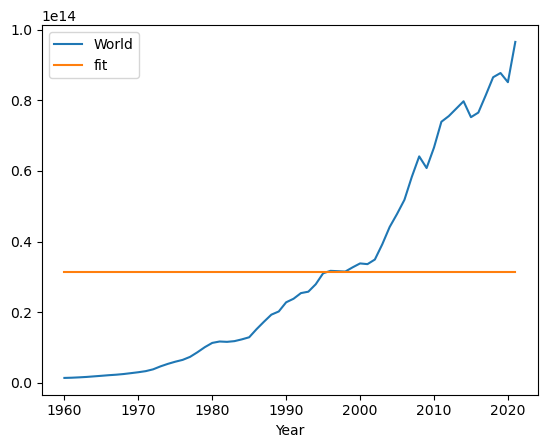

turning point 1902.0814703394449 +/- inf
GDP at turning point 31237.41942807317 +/- inf
growth rate 1.6739460371016746 +/- inf


0     3.123742e+13
1     3.123742e+13
2     3.123742e+13
3     3.123742e+13
4     3.123742e+13
          ...     
57    3.123742e+13
58    3.123742e+13
59    3.123742e+13
60    3.123742e+13
61    3.123742e+13
Name: fit, Length: 62, dtype: float64

In [45]:
sigma = np.sqrt(np.diag(covar))

df_world_gdp["fit"] = logistic(df_world_gdp["Year"], *param)

df_world_gdp.plot("Year", ["World", "fit"])

plt.show()

print("turning point", param[2], "+/-", sigma[2])

print("GDP at turning point", param[0]/1e9, "+/-", sigma[0]/1e9)

print("growth rate", param[1], "+/-", sigma[1])

df_world_gdp['fit']

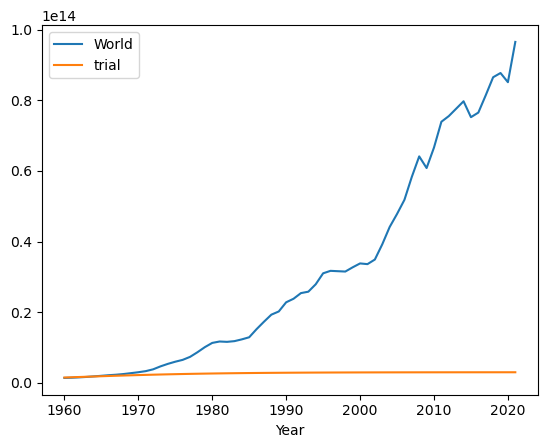

In [46]:
df_world_gdp["trial"] = logistic(df_world_gdp["Year"], 3e12, 0.10, 1960)
df_world_gdp.plot("Year", ["World", "trial"])
plt.show()

In [47]:
year = np.arange(1960, 2031)
forecast = logistic(year, *param)

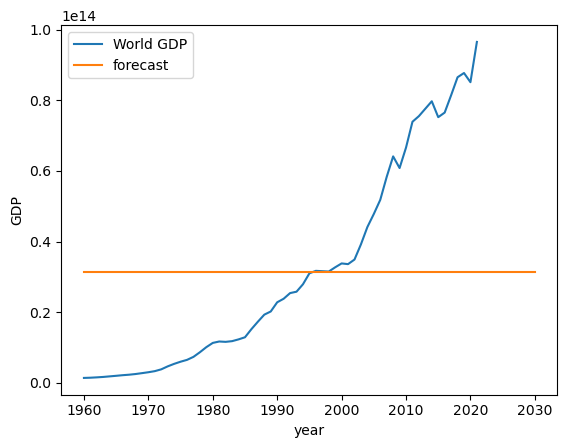

In [48]:
plt.figure()
plt.plot(df_world_gdp["Year"], df_world_gdp["World"], label="World GDP")
plt.plot(year, forecast, label="forecast")
plt.xlabel("year")
plt.ylabel("GDP")
plt.legend()
plt.show()

In [49]:
low, up = err.err_ranges(year, logistic, param, sigma)

/var/folders/6n/g66gqd0d7w3gjmnzl1zxx6j40000gn/T/ipykernel_4292/2118767874.py:3: RuntimeWarning: invalid value encountered in true_divide
  f = n0 / (1 + np.exp(-g*(t - t0)))


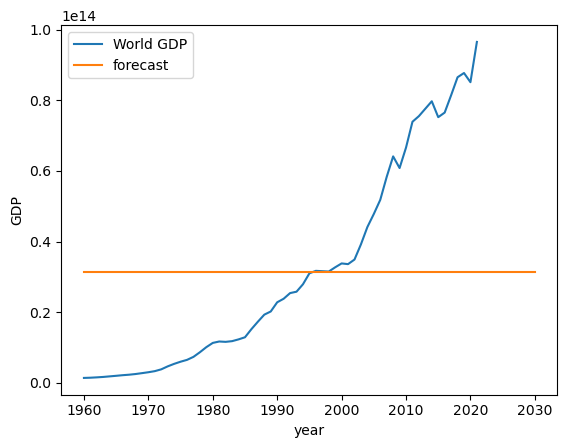

In [50]:
plt.figure()
plt.plot(df_world_gdp["Year"], df_world_gdp["World"], label="World GDP")
plt.plot(year, forecast, label="forecast")
plt.fill_between(year, low, up, color="yellow", alpha=0.7)
plt.xlabel("year")
plt.ylabel("GDP")
plt.legend()
plt.show()

In [51]:
print(logistic(2030, *param)/1e9)

print(err.err_ranges(2030, logistic, param, sigma))

# assuming symmetrie estimate sigma
gdp2030 = logistic(2030, *param)/1e9

low, up = err.err_ranges(2030, logistic, param, sigma)

sig = np.abs(up-low)/(2.0 * 1e9)

print()

print("GDP 2030", gdp2030, "+/-", sig)

31237.41942807317
(nan, nan)

GDP 2030 31237.41942807317 +/- nan


/var/folders/6n/g66gqd0d7w3gjmnzl1zxx6j40000gn/T/ipykernel_4292/2118767874.py:3: RuntimeWarning: invalid value encountered in double_scalars
  f = n0 / (1 + np.exp(-g*(t - t0)))


In [52]:
def poly(x, a, b, c, d, e):
    """ Calulates polynominal"""
    x = x - 1990
    f = a + b*x + c*x**2 + d*x**3 + e*x**4
    return f


[inf inf inf inf inf]


/Users/harkaran/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/var/folders/6n/g66gqd0d7w3gjmnzl1zxx6j40000gn/T/ipykernel_4292/3438084157.py:4: RuntimeWarning: invalid value encountered in multiply
  f = a + b*x + c*x**2 + d*x**3 + e*x**4
/var/folders/6n/g66gqd0d7w3gjmnzl1zxx6j40000gn/T/ipykernel_4292/3438084157.py:4: RuntimeWarning: invalid value encountered in add
  f = a + b*x + c*x**2 + d*x**3 + e*x**4


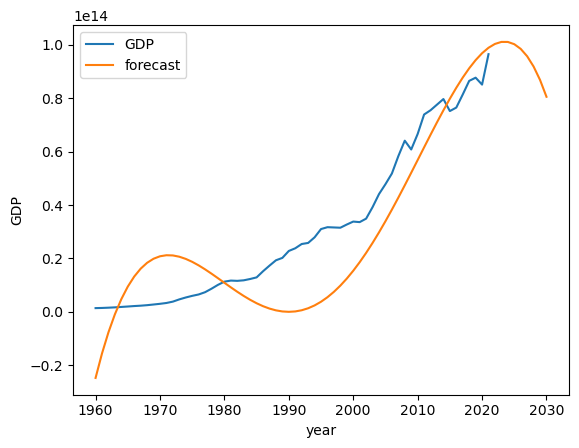

In [66]:
param, covar = opt.curve_fit(poly, df_world_gdp["Year"], df_world_gdp["World"])
sigma = np.sqrt(np.diag(covar))
print(sigma)
year = np.arange(1960, 2031)

forecast = poly(year, *param)

low, up = err.err_ranges(year, poly, param, sigma)

df_world_gdp["fit"] = poly(df_world_gdp["Year"], *param)

plt.figure()
plt.plot(df_world_gdp["Year"], df_world_gdp["World"], label="GDP")

plt.plot(year, forecast, label="forecast")

plt.fill_between(year, low, up, color="yellow", alpha=0.7)
plt.xlabel("year")
plt.ylabel("GDP")
plt.legend()
plt.show()